# Photonic crystals

Photonic crystals are a specific type of dieletric multilayer structure, which exhibit specific optical properties. The best known is the ubiquitous Bragg mirror, which can reach an almost perfect reflectivity with virtually no loss.

This notebook presents a few of the well known photonic crystal structures. As such, it does not teach anything about PyMoosh.

## Bragg Mirrors

A Bragg mirror is a dielectric multilayer structure optimized to reflect a specific wavelength.

(details...) Interferences, lambda/4

Let's start with a simple example :

List of materials:
Simple, non dispersive: epsilon= 1
Simple, non dispersive: epsilon= 2.25
Simple, non dispersive: epsilon= 4


Text(0, 0.5, 'Reflectivity')

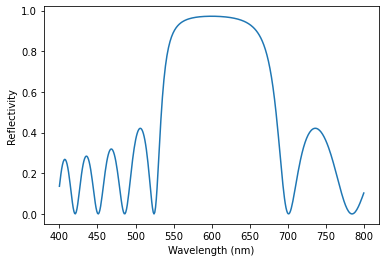

In [1]:
import PyMoosh as PM
import numpy as np
import matplotlib.pyplot as plt

incidence = 0
wavelength = 600

mat_1 = 1.5
mat_2 = 2
# Two materials of different optical index. The larger the difference in index, the more efficient the mirror will be

th_1 = wavelength / (4 * mat_1)
th_2 = wavelength / (4 * mat_2)
# The optimal thicknesses to have the Bragg mirror effect

materials = [1, mat_1**2, mat_2**2]

lay_pairs = 10

stack = [0] + [1, 2] * lay_pairs + [1, 0]
# We stack 2*lay_pairs+1 layers of dielectric materials with alternating index
# We also begin and start with the lower index material
thicknesses = [0] + [th_1, th_2] * lay_pairs + [th_1, 0]

structure = PM.Structure(materials, stack, thicknesses)

Rs = []
wav_list = np.linspace(400, 800, 400)
for wav in wav_list:
    r, t, R, T = PM.coefficient(structure, wav, incidence, 0)
    Rs.append(R)

plt.plot(wav_list, Rs)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectivity")

This spectrum above is a very typical Bragg mirror spectrum. Now let's see how this response depends on the number of layers :

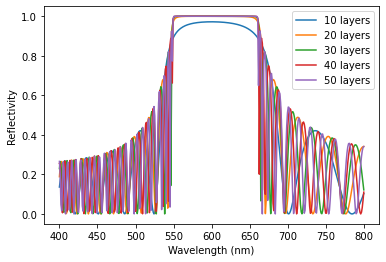

[0.97185959 0.99990947 0.99999971 1.         1.        ]


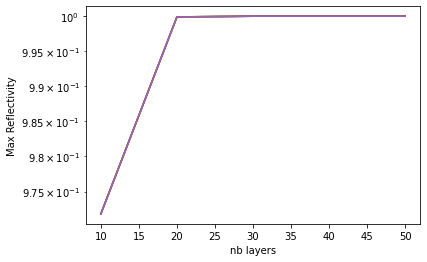

In [2]:
list_lay_pairs = np.arange(10, 51, 10)
wav_list = np.linspace(400, 800, 400)
Rs = np.zeros((len(list_lay_pairs), len(wav_list)))

for ilay, lay_pairs in enumerate(list_lay_pairs):

    stack = [0] + [1, 2] * lay_pairs + [1, 0]
    # We stack 2*lay_pairs+1 layers of dielectric materials with alternating index
    # We also begin and start with the lower index material
    thicknesses = [0] + [th_1, th_2] * lay_pairs + [th_1, 0]

    structure = PM.Structure(materials, stack, thicknesses, verbose=False)

    for iwav, wav in enumerate(wav_list):
        r, t, R, T = PM.coefficient(structure, wav, incidence, 0)
        Rs[ilay, iwav] = R

    plt.plot(wav_list, Rs[ilay], label=f"{lay_pairs} layers")
    
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectivity")
plt.legend()
plt.show()

Rs = np.array(Rs)

for k, lay_pairs in enumerate(list_lay_pairs):
    plt.plot(list_lay_pairs, Rs[:,len(wav_list)//2])
    
plt.xlabel("nb layers")
plt.ylabel("Max Reflectivity")
plt.yscale('log')

print(Rs[:,len(wav_list)//2])

As we can see, adding layers drastically improves the performance of the Bragg mirror, but does not change the spectral width of the high reflectance region (the band gap).

Now, let's see what effects have :
- Changing the material index
- Changing the incidence angle

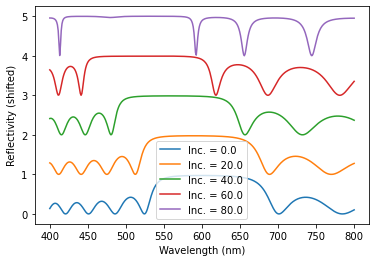

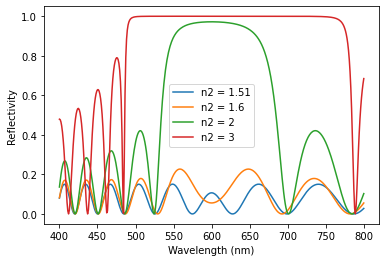

In [3]:
lay_pairs = 10
mat_2 = 2

incidence_list = np.linspace(0, 80, 5) # Changing the incidence angle
Rs_incidence = np.zeros((len(incidence_list), len(wav_list)))

for i_theta, inc in enumerate(incidence_list):

    stack = [0] + [1, 2] * lay_pairs + [1, 0]
    # We stack 2*lay_pairs+1 layers of dielectric materials with alternating index
    # We also begin and start with the lower index material
    thicknesses = [0] + [th_1, th_2] * lay_pairs + [th_1, 0]

    structure = PM.Structure(materials, stack, thicknesses, verbose=False)

    for iwav, wav in enumerate(wav_list):
        r, t, R, T = PM.coefficient(structure, wav, inc*np.pi/180, 0)
        Rs[i_theta, iwav] = R

    plt.plot(wav_list, Rs[i_theta]+i_theta, label=f"Inc. = {inc}")
    
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectivity (shifted)")
plt.legend()
plt.show()

mat2_list = [1.51, 1.6, 2, 3] # Changing the higher index material
Rs_material = np.zeros((len(mat2_list), len(wav_list)))

for imat, mat_2 in enumerate(mat2_list):
    th_2 = wavelength / (4 * mat_2)
    # The optimal thicknesses to have the Bragg mirror effect

    materials = [1, mat_1**2, mat_2**2]

    stack = [0] + [1, 2] * lay_pairs + [1, 0]
    # We stack 2*lay_pairs+1 layers of dielectric materials with alternating index
    # We also begin and start with the lower index material
    thicknesses = [0] + [th_1, th_2] * lay_pairs + [th_1, 0]

    structure = PM.Structure(materials, stack, thicknesses, verbose=False)

    for iwav, wav in enumerate(wav_list):
        r, t, R, T = PM.coefficient(structure, wav, incidence, 0)
        Rs[imat, iwav] = R

    plt.plot(wav_list, Rs[imat], label=f"n2 = {mat_2}")
    
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectivity")
plt.legend()
plt.show()

### Changing the incidence angle

We can see that for a different angle of incidence, the bandgap is at different wavelengths, but its Reflectance is the same

### Changing the index contrast

On the other hand, when we change the index contrast, here by changing the high-index material, we can see that the performance of the mirror changes drastically.
The higher the contrast, the more efficient the mirror, and the larger the bandgap.

## Chirped dielectric mirrors

We saw that to increase the bandgap, we could increase the index contrast. But what if we cannot choose which materials we work with? Increasing the number of layers does not increase the bandgap. So is there something we can do?

Obviously, yes! (otherwise I wouldn't be talking about it). To reflect light be $\lambda_1$ and$\lambda_2$, the most common way is to make a "chirped" mirror, where the dielectric layer thicknesses vary from $\lambda_1/4$ to $\lambda_2/4$.

Let's see if it works! We'll try to reflect all the visible light with the same materials as in the beginning:

List of materials:
Simple, non dispersive: epsilon= 1
Simple, non dispersive: epsilon= 2.25
Simple, non dispersive: epsilon= 4
List of materials:
Simple, non dispersive: epsilon= 1
Simple, non dispersive: epsilon= 2.25
Simple, non dispersive: epsilon= 4


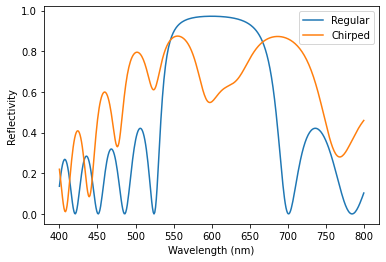

In [4]:
incidence = 0
wav_beg = 400
wav_end = 800
wav_list = np.linspace(wav_beg, wav_end, 400)

mat_1 = 1.5
mat_2 = 2
# Two materials of different optical index. The larger the difference in index, the more efficient the mirror will be

materials = [1, mat_1**2, mat_2**2]

lay_pairs = 10

## Starting with the regular Bragg mirror
wavelength = (wav_end+wav_beg)/2.
th_1 = wavelength / (4 * mat_1)
th_2 = wavelength / (4 * mat_2)
# The optimal thicknesses to have the Bragg mirror effect


stack = [0] + [1, 2] * lay_pairs + [1, 0]
# We stack 2*lay_pairs+1 layers of dielectric materials with alternating index
# We also begin and start with the lower index material
thicknesses = [0] + [th_1, th_2] * lay_pairs + [th_1, 0]

structure = PM.Structure(materials, stack, thicknesses)

Rs = []
wav_list = np.linspace(400, 800, 400)
for wav in wav_list:
    r, t, R, T = PM.coefficient(structure, wav, incidence, 0)
    Rs.append(R)

plt.plot(wav_list, Rs, label="Regular")


## And now the Chirped mirror
list_th_1 = np.linspace(wav_beg/(4*mat_1), wav_end/(4*mat_1), lay_pairs)
list_th_2 = np.linspace(wav_beg/(4*mat_2), wav_end/(4*mat_2), lay_pairs)

stack = [0] + [1, 2] * lay_pairs + [1, 0]
# We stack 2*lay_pairs+1 layers of dielectric materials with alternating index
# We also begin and start with the lower index material
thicknesses = [0]
for i in range(lay_pairs):
    thicknesses.append(list_th_1[i])
    thicknesses.append(list_th_2[i])
thicknesses.extend([wav_end/(4*mat_1), 0])


structure = PM.Structure(materials, stack, thicknesses)

Rs = []
wav_list = np.linspace(400, 800, 400)
for wav in wav_list:
    r, t, R, T = PM.coefficient(structure, wav, incidence, 0)
    Rs.append(R)

plt.plot(wav_list, Rs, label="Chirped")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectivity")
plt.legend()

As we can see, with few layers, it doesn't work very well... Indeed, the chirped mirror is not very efficient at reflecting each wavelength.

But let's increase the nb of layers!

30 layers


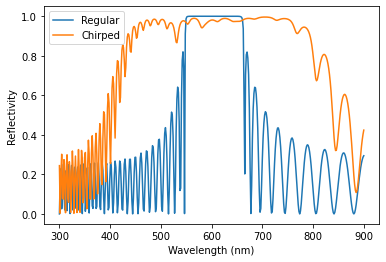

50 layers


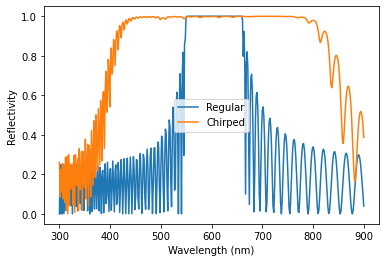

In [5]:

plot_wav = np.linspace(300, 900, 400)

lay_pairs = 30
print(f"{lay_pairs} layers")
## Starting with the regular Bragg mirror
wavelength = (wav_end+wav_beg)/2.
th_1 = wavelength / (4 * mat_1)
th_2 = wavelength / (4 * mat_2)
# The optimal thicknesses to have the Bragg mirror effect


stack = [0] + [1, 2] * lay_pairs + [1, 0]
# We stack 2*lay_pairs+1 layers of dielectric materials with alternating index
# We also begin and start with the lower index material
thicknesses = [0] + [th_1, th_2] * lay_pairs + [th_1, 0]

structure = PM.Structure(materials, stack, thicknesses, verbose=False)

Rs = []
for wav in plot_wav:
    r, t, R, T = PM.coefficient(structure, wav, incidence, 0)
    Rs.append(R)

plt.plot(plot_wav, Rs, label="Regular")


## And now the Chirped mirror
list_th_1 = np.linspace(wav_beg/(4*mat_1), wav_end/(4*mat_1), lay_pairs)
list_th_2 = np.linspace(wav_beg/(4*mat_2), wav_end/(4*mat_2), lay_pairs)

stack = [0] + [1, 2] * lay_pairs + [1, 0]
# We stack 2*lay_pairs+1 layers of dielectric materials with alternating index
# We also begin and start with the lower index material
thicknesses = [0]
for i in range(lay_pairs):
    thicknesses.append(list_th_1[i])
    thicknesses.append(list_th_2[i])
thicknesses.extend([wav_end/(4*mat_1), 0])


structure = PM.Structure(materials, stack, thicknesses, verbose=False)

Rs = []
for wav in plot_wav:
    r, t, R, T = PM.coefficient(structure, wav, incidence, 0)
    Rs.append(R)

plt.plot(plot_wav, Rs, label="Chirped")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectivity")
plt.legend()
plt.show()

###########################################""
lay_pairs = 50
print(f"{lay_pairs} layers")
## Starting with the regular Bragg mirror
wavelength = (wav_end+wav_beg)/2.
th_1 = wavelength / (4 * mat_1)
th_2 = wavelength / (4 * mat_2)
# The optimal thicknesses to have the Bragg mirror effect


stack = [0] + [1, 2] * lay_pairs + [1, 0]
# We stack 2*lay_pairs+1 layers of dielectric materials with alternating index
# We also begin and start with the lower index material
thicknesses = [0] + [th_1, th_2] * lay_pairs + [th_1, 0]

structure = PM.Structure(materials, stack, thicknesses, verbose=False)

Rs = []
for wav in plot_wav:
    r, t, R, T = PM.coefficient(structure, wav, incidence, 0)
    Rs.append(R)

plt.plot(plot_wav, Rs, label="Regular")


## And now the Chirped mirror
list_th_1 = np.linspace(wav_beg/(4*mat_1), wav_end/(4*mat_1), lay_pairs)
list_th_2 = np.linspace(wav_beg/(4*mat_2), wav_end/(4*mat_2), lay_pairs)

stack = [0] + [1, 2] * lay_pairs + [1, 0]
# We stack 2*lay_pairs+1 layers of dielectric materials with alternating index
# We also begin and start with the lower index material
thicknesses = [0]
for i in range(lay_pairs):
    thicknesses.append(list_th_1[i])
    thicknesses.append(list_th_2[i])
thicknesses.extend([wav_end/(4*mat_1), 0])


structure = PM.Structure(materials, stack, thicknesses, verbose=False)

Rs = []
for wav in plot_wav:
    r, t, R, T = PM.coefficient(structure, wav, incidence, 0)
    Rs.append(R)

plt.plot(plot_wav, Rs, label="Chirped")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectivity")
plt.legend()

Better, isn't it?

Obviously, a chirped mirror will never be as efficient as a regular Bragg mirror for a specific wavelength. However, it can reflect much larger spectra, for the same index contrast and layer number.

## Robustness and defects

To finish, let's just see how the regular Bragg mirror behaves with defects

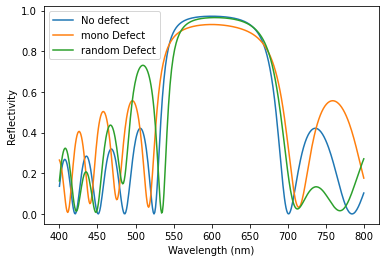

In [6]:
incidence = 0
wavelength = 600

mat_1 = 1.5
mat_2 = 2
# Two materials of different optical index. The larger the difference in index, the more efficient the mirror will be

th_1 = wavelength / (4 * mat_1)
th_2 = wavelength / (4 * mat_2)
# The optimal thicknesses to have the Bragg mirror effect

materials = [1, mat_1**2, mat_2**2]

lay_pairs = 10 # Adding one defect has more effect if there are less layers

stack = [0] + [1, 2] * lay_pairs + [1, 0]
# We stack 2*lay_pairs+1 layers of dielectric materials with alternating index
# We also begin and start with the lower index material
thicknesses = [0] + [th_1, th_2] * lay_pairs + [th_1, 0]

structure = PM.Structure(materials, stack, thicknesses, verbose=False)

Rs = []
wav_list = np.linspace(400, 800, 400)
for wav in wav_list:
    r, t, R, T = PM.coefficient(structure, wav, incidence, 0)
    Rs.append(R)

plt.plot(wav_list, Rs, label="No defect")

stack = [0] + [1, 2] * lay_pairs + [1, 0]
# We stack 2*lay_pairs+1 layers of dielectric materials with alternating index
# We also begin and start with the lower index material
thicknesses = [0] + [th_1, th_2] * lay_pairs + [th_1, 0]
thicknesses[4] = wavelength / (2 * mat_2) # Putting a half wavelength rather than quarter wavelength

structure = PM.Structure(materials, stack, thicknesses, verbose=False)

Rs = []
wav_list = np.linspace(400, 800, 400)
for wav in wav_list:
    r, t, R, T = PM.coefficient(structure, wav, incidence, 0)
    Rs.append(R)

plt.plot(wav_list, Rs, label="mono Defect")


stack = [0] + [1, 2] * lay_pairs + [1, 0]
# We stack 2*lay_pairs+1 layers of dielectric materials with alternating index
# We also begin and start with the lower index material
thicknesses = [0] + [th_1, th_2] * lay_pairs + [th_1, 0]
for i in range(1, lay_pairs*2-2):
    thicknesses[i] += 20*np.random.random() - 10 # Random +/- 10 nm variations on all heights

structure = PM.Structure(materials, stack, thicknesses, verbose=False)

Rs = []
wav_list = np.linspace(400, 800, 400)
for wav in wav_list:
    r, t, R, T = PM.coefficient(structure, wav, incidence, 0)
    Rs.append(R)

plt.plot(wav_list, Rs, label="random Defect")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectivity")
plt.legend()